<a href="https://colab.research.google.com/github/SaW2017/ClearingDesire_AI_ML/blob/master/Yolo3try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Setup YOLO and Darknet in Google-Colab, because we don`t have a great GPU
# and with google colab the use is free up to 12 hours at a time
# after that the runtime-environment get destroyed and with it every variable
# thats why we connect to our drive for some data

In [13]:
# check current CUDA version to know which cuDNN we have to download 
# !/usr/local/cuda/bin/nvcc --version

In [14]:
# We're unzipping the cuDNN files from our Drive folder directly to the VM CUDA folders
# !tar -xzvf '/content/gdrive/MyDrive/AIuML/darknet/cuDNN/cudnn-10.1-linux-x64-v8.0.5.39.tgz' -C '/usr/local/'
# !chmod a+r /usr/local/cuda/include/cudnn.h

In [15]:
# test the version
#!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

# if not working does this to check if file is there
# !cat /usr/local/cuda/include/cudnn.h

In [21]:
# update everything to run in no further problems
!apt-get update
!apt-get upgrade

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:14 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Reading package lists... Done


In [22]:
# openCV has a lot of dependecies and after a long series of trial and error
# there's some things we need to install first
# install dependencies for openCV
!apt-get install build-essential
!apt-get install cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
git is already the newest version (1:2.17.1-1ubuntu0.7).
libavcodec-dev is already the newest version (7:3.4.8-0ubuntu0.2).
libavcodec-dev set to manually installed.
libavformat-dev is already the newest version (7:3.4.8-0ubuntu0.2).
libavformat-dev set to manually installed.
libswscale-dev is already the newest version (7:3.4.8-0ubuntu0.2).
libswscale-dev set to manually installed.
The following additional packages will be installed:
  autoconf automake autopoint autotools-dev debhelper dh-autoreconf
  dh-strip-nondeterminism file gettext gettext-base gi

In [23]:
# more things we need to install
!apt-get install libavcodec-dev libavformat-dev libswscale-d

# install cmake
# CMake is cross-platform free and open-source software for build automation,
# testing and packaging using a compiler-independent method.
# CMake is not a build system but rather it's a build-system generator.
# It supports directory hierarchies and applications that depend on multiple libraries.
!apt-get -y install cmake
!which cmake

!cmake --version

# install OpenCV
!apt-get install libopencv-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libswscale-d
Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
/usr/local/bin/cmake
cmake version 3.12.0

CMake suite maintained and supported by Kitware (kitware.com/cmake).
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopencv-dev is already the newest version (3.2.0+dfsg-4ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


In [24]:
# git clone Darknet fork from AlexeyAB -> github-Repo
!git clone https://github.com/AlexeyAB/darknet/

Cloning into 'darknet'...
remote: Enumerating objects: 14691, done.
remote: Total 14691 (delta 0), reused 0 (delta 0), pack-reused 14691
Receiving objects: 100% (14691/14691), 13.27 MiB | 14.24 MiB/s, done.
Resolving deltas: 100% (9995/9995), done.


In [25]:
# install vim because cat throws an error and we want to check if
# we successfully changed the makefile
!apt-get install vim

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libgpm2 vim-common vim-runtime xxd
Suggested packages:
  gpm ctags vim-doc vim-scripts
The following NEW packages will be installed:
  libgpm2 vim vim-common vim-runtime xxd
0 upgraded, 5 newly installed, 0 to remove and 6 not upgraded.
Need to get 6,722 kB of archives.
After this operation, 32.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 xxd amd64 2:8.0.1453-1ubuntu1.4 [49.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 vim-common all 2:8.0.1453-1ubuntu1.4 [70.4 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgpm2 amd64 1.20.7-5 [15.1 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 vim-runtime all 2:8.0.1453-1ubuntu1.4 [5,435 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 vim amd64 2:8.0.1453-

In [26]:
# watch makefile, but don`t forget to stop the cell manually
%cd darknet
#!vim Makefile

/content/darknet


In [27]:
# Download the Yolo-Weights from the official Website
# allos to detect on 80 different classes right from the start
!ls
!wget https://pjreddie.com/media/files/yolov3.weights

3rdparty	DarknetConfig.cmake.in	include		       results
build		darknet_images.py	json_mjpeg_streams.sh  scripts
build.ps1	darknet.py		LICENSE		       src
build.sh	darknet_video.py	Makefile	       vcpkg.json
cfg		data			net_cam_v3.sh	       video_yolov3.sh
cmake		image_yolov3.sh		net_cam_v4.sh	       video_yolov4.sh
CMakeLists.txt	image_yolov4.sh		README.md
--2021-02-14 07:14:50--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   106MB/s    in 2.2s    

2021-02-14 07:14:52 (106 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [28]:
# edit the makefile to enable opencv support and gpu support with changing to 1
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile

In [29]:
# check if changing the makefile worked, Don't forget to stop cell manually
#!vim Makefile

In [30]:
# changing to parent directory
%cd ..
!ls

/content
darknet  gdrive  sample_data


In [31]:
# g++ command is a GNU c++ compiler invocation command, 
# which is used for preprocessing, compilation, assembly and 
# linking of source code to generate an executable file
# g++  >> command allow us to stop this process at the intermediate stage
!apt install g++-5

# install the 5th version of g++ & gcc
# GNU Compiler Collections which is used to compile mainly C and C++ language.
# gcc  >> command allow us to stop the compilation process at different stages
!apt install gcc-5

# and do the updates
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 10
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 20
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 10
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 20
!update-alternatives --install /usr/bin/cc cc /usr/bin/gcc 30
!update-alternatives --set cc /usr/bin/gcc
!update-alternatives --install /usr/bin/c++ c++ /usr/bin/g++ 30
!update-alternatives --set c++ /usr/bin/g++

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cpp-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
Suggested packages:
  gcc-5-locales g++-5-multilib gcc-5-doc libstdc++6-5-dbg gcc-5-multilib
  libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg libasan2-dbg
  liblsan0-dbg libtsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg
  libquadmath0-dbg libstdc++-5-doc
The following NEW packages will be installed:
  cpp-5 g++-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
0 upgraded, 9 newly installed, 0 to remove and 6 not upgraded.
Need to get 29.1 MB of archives.
After this operation, 100 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 gcc-5-base amd64 5.5.0-12ubuntu1 [17.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libisl15 amd64 0.18-4 [548 kB]
Get:3 http

In [32]:
# We're unzipping the cuDNN files from our Drive folder directly to the VM CUDA folders
#!tar -xzvf '/content/gdrive/MyDrive/AIuML/darknet/cuDNN/cudnn-10.1-linux-x64-v8.0.5.39.tgz' -C '/usr/local/'
#!chmod a+r /usr/local/cuda/include/cudnn.h
# check if its worked
#!cat /usr/local/cuda/include/cudnn.h

In [33]:
# install CUDA to speed up the performance 
# install it in a different way
!apt update -qq;
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!apt-get update -qq

# install compilers
!apt-get install cuda -y -qq 
# update and install 
!apt update
!apt upgrade
# have to install this too, otherwise its not working
!apt install cuda-8.0 -y

6 packages can be upgraded. Run 'apt list --upgradable' to see them.
--2021-02-14 07:15:07--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 152.199.0.24
Connecting to developer.nvidia.com (developer.nvidia.com)|152.199.0.24|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/compute/cuda/8.0/prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb [following]
--2021-02-14 07:15:07--  https://developer.nvidia.com/compute/cuda/8.0/prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?PpweQrnDV43_

In [34]:
# make sure that the GPUs are working DONT FORGET TO SWITCH NOTEBOOK on GPU!!!!
import tensorflow as tf
gpu_device_name = tf.test.gpu_device_name()
print(gpu_device_name)
print("is working?!")

# check cuda version
!/usr/local/cuda/bin/nvcc --version

/device:GPU:0
is working?!
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2016 NVIDIA Corporation
Built on Tue_Jan_10_13:22:03_CST_2017
Cuda compilation tools, release 8.0, V8.0.61


In [35]:
# after everything got installed: and changing the makefile
# --> run the make command
# buil darknet and installing all the dependencies from the binary files
%cd darknet
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1424:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^
./src/image_opencv.cpp:1400:9: warning: unused variable ‘it_tb_res’ [-Wunused-variable]
     int it_tb

In [36]:
!ls
#Now, let's see if everything works by running it on a test image
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

3rdparty	darknet			include		       results
backup		DarknetConfig.cmake.in	json_mjpeg_streams.sh  scripts
build		darknet_images.py	LICENSE		       src
build.ps1	darknet.py		Makefile	       vcpkg.json
build.sh	darknet_video.py	net_cam_v3.sh	       video_yolov3.sh
cfg		data			net_cam_v4.sh	       video_yolov4.sh
cmake		image_yolov3.sh		obj		       yolov3.weights
CMakeLists.txt	image_yolov4.sh		README.md
 CUDA-version: 8000 (11020), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF

In [37]:
#Let's define some functions that will let us show images, and upload and 
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)



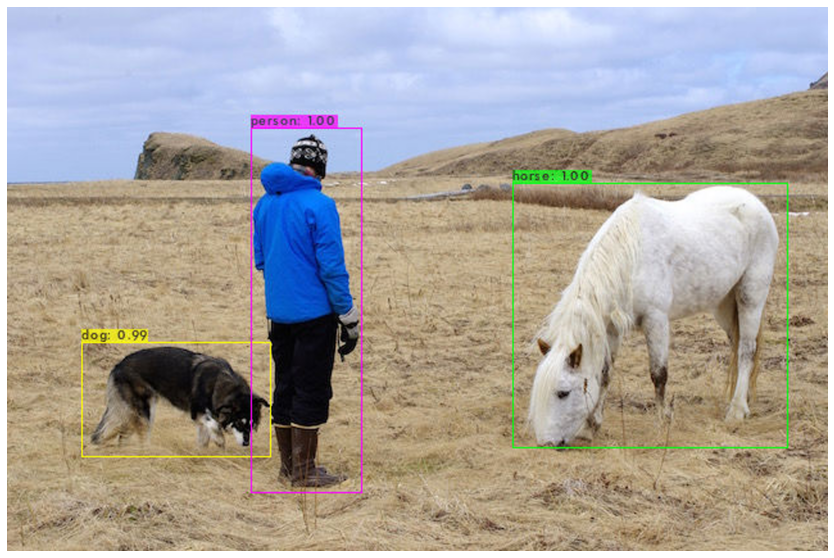

In [38]:
#You should see a person, a dog and a horse here and they might even see you.....
imShow('predictions.jpg')

In [ ]:
# This cell imports the drive library and mounts our Google Drive as a VM local drive. You can access to your Drive files 
# using this path "/content/gdrive/MyDrive/"
# we need this because our files are there

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Not Necessary cell
# List the content of your local computer folder 
# !ls '/content/gdrive/MyDrive/AIuML/darknet/'
!ls '/content/gdrive/MyDrive/AIuML/darknet/'

bbox_txt					       cuDNN	label.zip
bin						       darknet	pictures
cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb  images


In [40]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/AIuML/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/AIuML /mydrive
!ls /mydrive

ln: failed to create symbolic link '/mydrive/darknet': File exists
'ANtwort aufs Proposal.gdoc'   Project.gdoc
 darknet		      'Projekt AI.gdoc'
 Literatur.gdoc		       proposal_v1.docx
 Papers			      'Volk_Wachter_Proposal[4795].pdf'


In [43]:
!ls /mydrive/darknet/pictures/

airplane_0.jpg


[Errno 20] Not a directory: 'darknet'
/content/darknet
 CUDA-version: 8000 (11020), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, 

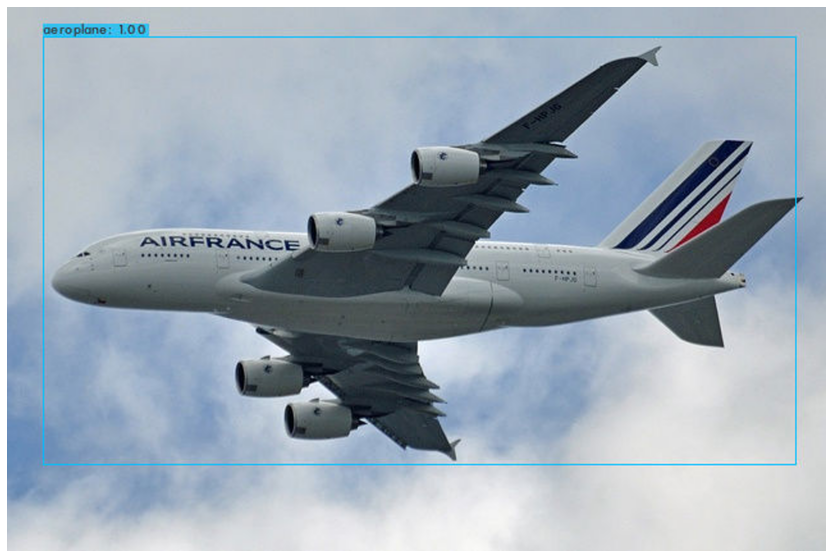

In [48]:
# run darknet command with google drive image (my path to thge example image is /darknet/pictures/airplane_0.jpg)
# to check if this is working
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights /mydrive/darknet/pictures/airplane_0.jpg
imShow('predictions.jpg')

In [54]:
# GOOGLE DRIVE DOWNLOAD to have the results - dont forget collab will be deleted after 12 hours
# change the image name - how it will be saved as 
!cp predictions.jpg /mydrive/images/detection1.jpg

In [53]:
## Start to train our model
# state class in ...

3rdparty	darknet			json_mjpeg_streams.sh  scripts
backup		DarknetConfig.cmake.in	LICENSE		       src
bad.list	darknet_images.py	Makefile	       vcpkg.json
build		darknet.py		net_cam_v3.sh	       video_yolov3.sh
build.ps1	darknet_video.py	net_cam_v4.sh	       video_yolov4.sh
build.sh	data			obj		       yolov3.weights
cfg		image_yolov3.sh		predictions.jpg
cmake		image_yolov4.sh		README.md
CMakeLists.txt	include			results


In [56]:
# First change the Yolov3 config File
# darknet --> cfg --> yolov3.cfg

# 1.
# commend testing: batch & subdivisions lines!
# uncommend Training-Lines
# batch=64
# subdivisions=16    --> if there`s a CUDA Error then rise 16 - 32 if this is 
# still not working then up tp 64!

# 2.
# change max_batches  --> how many times our training is going to run through
# the data: its like 2000 * classes you have (we have just one - airplane, 
# but the minimum should be 4000 - for enough time to train the model) 

# 3. 
# change steps to 80% of the max batches and 90 % of the mac batches
# our case: steps=3200,3600

# Step 4. and 5. for EVERY YOLO-Layer in the cfg file  (3 layers!)

# 4.
# [yolo] --> this defines our yolo-layers within our network
# set Classes 80 to 1 (airplane)

# 5.
# [convolutional] 
# change the filters from 255 to 18
# according to this equation:
# filters = (classes +5) *3  [convolutional] before each [yolo] layer
# classes=1 --> filters = 18  (classes 3 -> filters = 24)

# 6. (optional) if you`re getting a out of memory error
# ctrl + F (random)
# setting each random to 0!
# because random 1 resize every image as it trains it
# that it doesnt overfit 416x416 image
# because it resizes every image before the training

# Finally
# save file as yolov3-custom.cfg

In [57]:
# Create new files:
# obj.names  -> with our name in it for the class  (airplane)
# obj.data  -> to specifiy:
# how many classes
# where to find our training data...
# 
#classes = 1
#train = data/train.txt   Path from the root of the darknet folder
#valid = data/test.txt    Name of the images to use for training/testing
#names = data/obj.names   
#backup = /mydrive/darknet/backup/   --> to save our custom weights! Create this folder!

In [58]:
# upload the obj.names and obj.data files to the cloud VM from Google Drive
!cp /mydrive/darknet/obj.names ./data
!cp /mydrive/darknet/obj.data  ./data


In [61]:
# Generating the train.txt --> has to be filled with the relative paths to the pictures
import os

os.path

<module 'posixpath' from '/usr/lib/python3.6/posixpath.py'>